<a href="https://colab.research.google.com/github/SoumeshPattanaik/Queries-on-Time-Series-Analysis/blob/main/5_Moving_Window_Functions_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab
%matplotlib inline

In [2]:
# Window functions are like aggregation functions
# You can use them in conjunction with .resample() which will soon be a deferred operation

In [5]:
# andn() is another function for doing matrix operations in numpy. It returns a matrix of random values from a univariate 
# “normal” (Gaussian) distribution of mean 0 and variance 1.

df = pd.DataFrame(np.random.randn(600,3),index = pd.date_range('July 11 2021',freq='S',periods=600),columns=['A','B','C'])
df

,A,B,C
2021-07-11 00:00:00,0.306207,-1.077356,-0.052924
2021-07-11 00:00:01,0.896168,0.009900,0.671281
2021-07-11 00:00:02,0.613257,1.940129,0.637048
2021-07-11 00:00:03,0.595906,2.850203,-0.330827
2021-07-11 00:00:04,-0.911151,0.113202,-0.304810
...,...,...,...
2021-07-11 00:09:55,-0.003651,0.331800,0.951006
2021-07-11 00:09:56,-0.515460,1.038431,-0.058775
2021-07-11 00:09:57,0.439238,1.928576,-0.033093
2021-07-11 00:09:58,1.519689,-1.853908,-1.391187


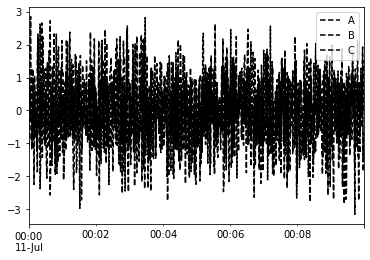

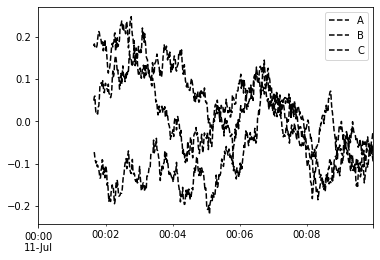

In [14]:
r = df.rolling(window = 100)
#r.agg, r.apply, r.count, r.exclusions, r.max, r.median, r.name, r.quantile, r.kurt, r.cov, r.corr, r.aggregate, r.std, r.skew, r.sum, r.var
df.plot(style='k--')
r.mean().plot(style='k--')

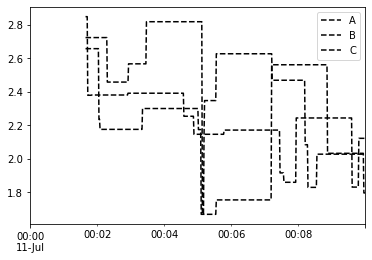

In [12]:
r.max().plot(style='k--')

In [15]:
# can also easily plot a rolling average per column
df = pd.DataFrame(np.random.randn(1000, 4), index = pd.date_range('6/6/16', periods = 1000), columns = ['A', 'B', 'C', 'D'])

In [16]:
df.head()

,A,B,C,D
2016-06-06,-0.634253,-1.262348,-0.113982,-0.104508
2016-06-07,1.149487,-2.059560,-0.137610,-0.039333
2016-06-08,-0.502828,0.369836,-0.688869,0.235438
2016-06-09,-1.037276,-0.344039,-1.402212,-0.355532
2016-06-10,0.894803,1.095776,1.014403,-0.578354


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa8283e7790>,
      dtype=object)

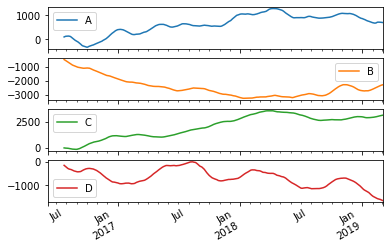

In [17]:
df = df.cumsum()
df.rolling(window = 50).sum().plot(subplots=True)

In [18]:
# Expanding windows
# Yields the value of the statistic with all the data available up to that point in time
df.expanding(min_periods = 1).mean()[1:5]

,A,B,C,D
2016-06-07,-0.059509,-2.292128,-0.182787,-0.124174
2016-06-08,-0.035538,-2.512109,-0.435345,-0.052251
2016-06-09,-0.282871,-2.708110,-0.912177,-0.105172
2016-06-10,-0.252310,-2.606555,-0.995396,-0.252595
